In [1]:
using DynamicalBilliards, PyPlot, JLD

In [2]:
space = 2.2 # Space between two adjacent disks
r = 1.0 # Radius of the disk

polygon_sides = n = 6

bth = bt =  billiard_polygon(polygon_sides, space/sqrt(3); setting = "periodic")
d = Disk([0.,0.], r)
push!(bth, d);

In [3]:
to = 100.0
N = 10^6
beta = -0.2;

In [4]:
results = classical_importance_sampling(to, N, bt, polygon_sides, beta);

In [5]:
s = results[:,1]
sinphi = results[:,2]
distances = results[:,3]
acceptance =  length(unique(s))/N

0.544899

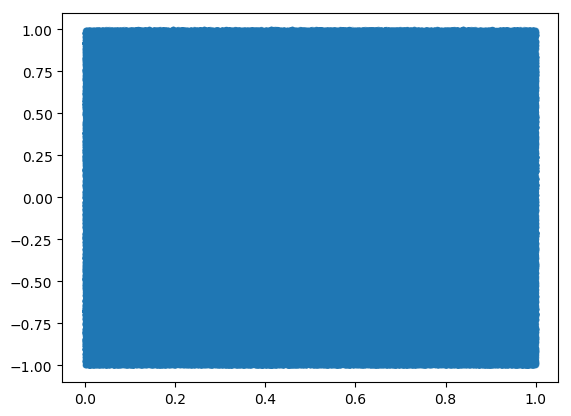

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f8d03d9ba10>

In [6]:
plot(s, sinphi, ".", alpha = 0.4)

In [7]:
using SpecialFunctions

In [8]:
function Z(r::T, t::T, D::T, beta::T) where{T<:AbstractFloat}
    1. - exp(D*t*beta^2)*sqrt(pi*D*t)*beta*erfc(sqrt(D*t)*beta)
end

Z (generic function with 1 method)

In [9]:
function theor_dist(r::T, t::T, D::T, beta::T) where{T<:AbstractFloat}
    return 1/(2D*t)*exp(-r^2/(4D*t))*r*exp(-beta*r)/Z(r,t,D, beta)
end

theor_dist (generic function with 1 method)

In [10]:
D_theor = 0.17 #Taken from Gaspard, PRE, 1995, Chaotic scattering and diffusion in the Lorentz gas
r_exp = minimum(distances):0.01:maximum(distances)
tdist = [theor_dist(k, to, D_theor, beta) for k in r_exp];

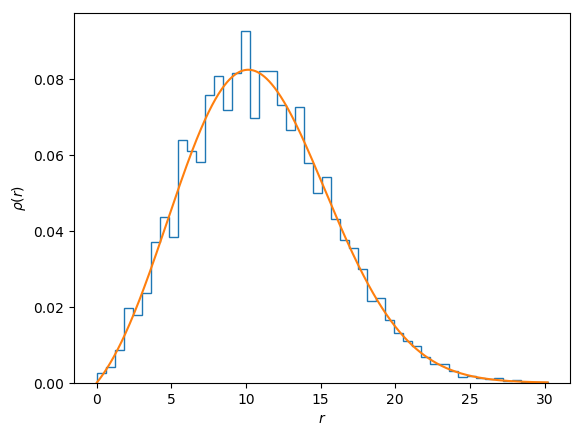

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f8d039cae90>

In [11]:
plt[:hist](distances, normed = true, 50, histtype = "step");
plt[:xlabel](L"$r$")
plt[:ylabel](L"$\rho(r)$")

plot(r_exp, tdist, label = "Theoretical")

In [12]:
using StatsBase

In [13]:
hist = fit(Histogram, distances, closed = :right, nbins = 1000);

In [14]:
dbin = Float64[hist.edges[1].step][1]
edges = collect(hist.edges[1][2:end]);
result = (hist.weights.*exp.(beta*edges));
result = result/(sum(result)*dbin);

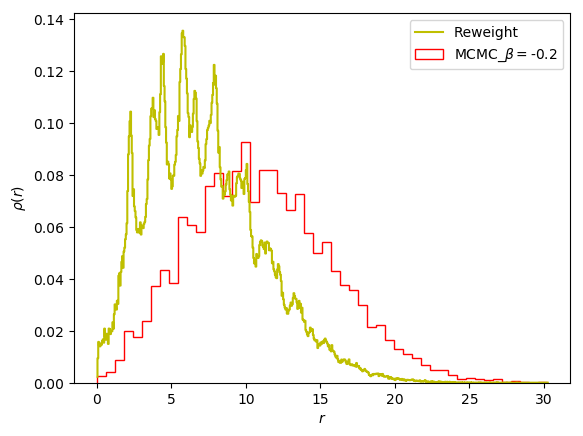

PyObject <matplotlib.legend.Legend object at 0x7f8cf94bd7d0>

In [18]:
#plt[:hist](distances_unif, normed = true, 50, histtype = "step", label ="Uniform_Distribution", color = "b");
plt[:hist](distances, normed = true, 50, histtype = "step", label = L"MCMC_$\beta =$"*"$beta" , color = "r");

plt[:xlabel](L"$r$")
plt[:ylabel](L"$\rho(r)$")

plot(edges, result, ls = "steps", color = "y", label = "Reweight")

#plt[:yscale]("log")
#plt[:xscale]("log")
#plt[:xlim](60,80)
plt[:legend]()

In [19]:
prec = 10^-3.
estimator = sum(result[edges .> sqrt(-4*D_theor*to*log(prec))])/sum(result)

0.0010135143728610318

In [17]:
(estimator - prec)/prec*100 ##Percent of error

1.3514372861031825

In [ ]:
##Ten runs
runs = 10
error = zeros(10)
for i in 1:runs
    birkres = classical_importance_sampling(to, N, bt, polygon_sides, beta);
    distances = birkres[:,3]
    hist = fit(Histogram, distances, closed = :right, nbins = 1000);
    dbin = Float64[hist.edges[1].step][1]
    edges = collect(hist.edges[1][2:end]);
    result = (hist.weights.*exp.(beta*edges));
    result = result/(sum(result)*dbin);
    estimator = sum(result[edges .> sqrt(-4*D_theor*to*log(prec))])/sum(result)
    error[i] = (estimator - prec)/prec*100
    println(i)
end
    
    

1
2
